In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


%matplotlib inline

In [2]:
Nash_incident_df= pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv')
Nash_incident_df

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,04/27/2021 08:00:00 AM,04/28/2021 02:08:00 PM,DIVISION ST,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
1,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,05/04/2021 03:07:00 PM,05/04/2021 04:26:00 PM,SHELBY AVE,...,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)
2,20150345704_11,20150345704,T,NaN,O,OPEN,Open,04/13/2015 03:00:00 PM,04/13/2015 05:12:00 PM,180 WALLACE RD,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,NaN
3,20210247765_11,20210247765,O,NaN,O,OPEN,Open,05/03/2021 11:00:00 PM,05/03/2021 11:49:00 PM,CLARKSVILLE PIKE,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.9 36.32)
4,20210249540_11,20210249540,D,DISPATCHED,O,OPEN,Open,05/04/2021 11:45:00 PM,05/05/2021 12:45:00 AM,UNIVERSITY CT,...,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.77 36.15)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913235,20160600990_11,20160600990,D,DISPATCHED,D,DEATH OF OFFENDER,Closed,07/04/2016 03:59:00 PM,07/04/2016 05:59:00 PM,203 203,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,POINT (-86.701 36.27)
913236,20150722886_11,20150722886,D,DISPATCHED,A,CLEARED BY ARREST,Closed,08/01/2015 05:11:00 PM,08/01/2015 05:11:00 PM,405 405,...,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.801 36.223)
913237,20200775916_11,20200775916,D,DISPATCHED,U,UNFOUNDED,Closed,12/18/2020 06:06:00 PM,12/18/2020 09:15:00 PM,914 914,...,NONE,1,False,U,UNKNOWN,U,U,Non-Hispanic,NaN,POINT (-86.747 36.187)
913238,20150013134_11,20150013134,O,NaN,U,UNFOUNDED,Closed,01/03/2015 08:30:00 AM,01/05/2015 11:28:00 AM,2407 2407,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.675 36.308)


In [3]:
Nash_incident_df .isnull().sum()

Primary Key                         0
Incident Number                     0
Report Type                        44
Report Type Description         60394
Incident Status Code               24
Incident Status Description        24
Investigation Status                0
Incident Occurred                   0
Incident Reported                  10
Incident Location                2722
Latitude                        16833
Longitude                       16833
ZIP Code                       417751
RPA                            114767
Zone                           114767
Location Code                      21
Location Description               21
Offense Number                    230
Offense NIBRS                      94
Offense Description                 0
Weapon Primary                   2047
Weapon Description               2929
Victim Number                       0
Domestic Related                    0
Victim Type                        18
Victim Description                123
Victim Gende

In [4]:
#converting date and time in to datetime format. 
Nash_incident_df ['Incident Occurred'] = pd.to_datetime(Nash_incident_df ['Incident Occurred'])
Nash_incident_df.head(2)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,2021-04-27 08:00:00,04/28/2021 02:08:00 PM,DIVISION ST,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
1,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,2021-05-04 15:07:00,05/04/2021 04:26:00 PM,SHELBY AVE,...,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)


In [5]:
# slicing dateset to year 2010-01-01 00:00:00 to 2022-08-01 00:00:00
incident_years= Nash_incident_df [(Nash_incident_df ['Incident Occurred']>= '2010-01-01 00:00:00') & (Nash_incident_df ['Incident Occurred'] < '2022-08-01 00:00:00')]
incident_years.head(2)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,2021-04-27 08:00:00,04/28/2021 02:08:00 PM,DIVISION ST,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
1,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,2021-05-04 15:07:00,05/04/2021 04:26:00 PM,SHELBY AVE,...,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)


In [6]:
incident_years.columns

Index(['Primary Key', 'Incident Number', 'Report Type',
       'Report Type Description', 'Incident Status Code',
       'Incident Status Description', 'Investigation Status',
       'Incident Occurred', 'Incident Reported', 'Incident Location',
       'Latitude', 'Longitude', 'ZIP Code', 'RPA', 'Zone', 'Location Code',
       'Location Description', 'Offense Number', 'Offense NIBRS',
       'Offense Description', 'Weapon Primary', 'Weapon Description',
       'Victim Number', 'Domestic Related', 'Victim Type',
       'Victim Description', 'Victim Gender', 'Victim Race',
       'Victim Ethnicity', 'Victim County Resident', 'Mapped Location'],
      dtype='object')

In [7]:
#Droping columns that may not be needed for this anaysis 
incident_years_column_drop = incident_years.drop(['Report Type','Incident Status Code','Incident Status Code','ZIP Code', 'Incident Reported','Report Type Description','Weapon Primary','Victim Type','Victim Ethnicity','Investigation Status','Incident Status Description','Victim County Resident'], axis = 1)
incident_years_column_drop.head(2)

,Primary Key,Incident Number,Incident Occurred,Incident Location,Latitude,Longitude,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Description,Victim Number,Domestic Related,Victim Description,Victim Gender,Victim Race,Mapped Location
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.78 36.15)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.17,-86.75,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),NONE,2,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.75 36.17)


In [8]:
incident_dups=incident_years_column_drop [incident_years_column_drop .duplicated(['Primary Key', 'Incident Occurred', 'Incident Number'], keep=False)]
incident_dups

,Primary Key,Incident Number,Incident Occurred,Incident Location,Latitude,Longitude,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Description,Victim Number,Domestic Related,Victim Description,Victim Gender,Victim Race,Mapped Location
6228,20220161154_11,20220161154,2022-02-07 12:00:00,ABBOTT MARTIN RD,36.110,-86.820,NaN,NaN,55.0,Shopping Mall,1.0,23D,LARC - FROM BLDG,NONE,1,False,BUSINESS,NaN,NaN,POINT (-86.82 36.11)
33059,20210129944_11,20210129944,2021-03-05 05:20:00,ANDREW JACKSON PKWY & SAUNDERSVILLE RD,36.226,-86.598,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,13B,SIMPLE ASSLT,PERSONAL (HANDS),1,True,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.598 36.226)
34176,20220161154_11,20220161154,2022-02-07 12:00:00,ABBOTT MARTIN RD,36.110,-86.820,NaN,NaN,55.0,Shopping Mall,1.0,23D,LARC - FROM BLDG,NONE,1,False,BUSINESS,NaN,NaN,POINT (-86.82 36.11)
34261,20220161154_11,20220161154,2022-02-07 12:00:00,ABBOTT MARTIN RD,36.110,-86.820,NaN,NaN,55.0,Shopping Mall,1.0,23D,LARC - FROM BLDG,NONE,1,False,BUSINESS,NaN,NaN,POINT (-86.82 36.11)
34630,20210129944_11,20210129944,2021-03-05 05:20:00,ANDREW JACKSON PKWY & SAUNDERSVILLE RD,36.226,-86.598,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,13B,SIMPLE ASSLT,PERSONAL (HANDS),1,True,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.598 36.226)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732182,20200335550_1,20200335550,2020-05-12 07:30:00,1105 1105,36.094,-86.644,8935.0,535.0,20.0,"PARKING LOT, GARAGE",NaN,13A,INTENTIONAL AGGRAVATED ASSAULT,LETHAL/CUTTING INSTRUMENT,1,True,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.644 36.094)
734531,20160279346_1,20160279346,2016-03-25 14:45:00,912 912,36.167,-86.799,5427.0,613.0,22.0,"RESIDENCE, HOME",NaN,520,"WEAPON OFFENSE, CRIMINAL ATTEMPT",REVOLVER,1,False,SOCIETY,NaN,NaN,POINT (-86.799 36.167)
737793,20150017740_11,20150017740,2015-01-06 16:45:00,MURFREESBORO PIKE & PARRIS AVE,36.219,-86.846,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,NONE,1,False,SOCIETY,NaN,NaN,POINT (-86.846 36.219)
895238,20200291691_1,20200291691,2020-04-24 13:15:00,6001 6001,36.163,-86.597,9545.0,523.0,22.0,"RESIDENCE, HOME",NaN,35A,MARIJUANA - POSSESS,NONE,1,False,SOCIETY,NaN,NaN,POINT (-86.597 36.163)


In [9]:
incident_years_column_drop.columns

Index(['Primary Key', 'Incident Number', 'Incident Occurred',
       'Incident Location', 'Latitude', 'Longitude', 'RPA', 'Zone',
       'Location Code', 'Location Description', 'Offense Number',
       'Offense NIBRS', 'Offense Description', 'Weapon Description',
       'Victim Number', 'Domestic Related', 'Victim Description',
       'Victim Gender', 'Victim Race', 'Mapped Location'],
      dtype='object')

In [10]:
#Renaming columns. 
incident_years_new_name = incident_years_column_drop.rename({'Primary Key':'primary_key','Incident Number':'incident_number','Incident Occurred':'incident_date', 'Incident Location':'incident_location','Latitude':'lat', 'Longitude': 'lng','Location Code': 'location_code','Location Description': 'location_description', 'Offense Description':'offense_decription','Weapon Description':'weapon_description', 'Victim Number':'vicitm_number', 'Victim Description':'victim_description','Victim Gender':'victim_gender','Mapped Location':'geometry'  }, axis='columns')
incident_years_new_name.head(2)

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,Offense NIBRS,offense_decription,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.78 36.15)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.17,-86.75,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),NONE,2,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.75 36.17)


In [11]:
#Dropping duplication
incident_duplicat_drop=incident_years_new_name.drop_duplicates(subset=['primary_key', 'incident_date'], keep=False)
incident_duplicat_drop

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,Offense NIBRS,offense_decription,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.150,-86.780,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.78 36.15)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.170,-86.750,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),NONE,2,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.75 36.17)
2,20150345704_11,20150345704,2015-04-13 15:00:00,180 WALLACE RD,NaN,NaN,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,720,HARRASSMENT (NUISANCE),NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,NaN
3,20210247765_11,20210247765,2021-05-03 23:00:00,CLARKSVILLE PIKE,36.320,-86.900,3315.0,635.0,22.0,"RESIDENCE, HOME",1.0,23G,LARC - PARTS FROM VEH,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.9 36.32)
4,20210249540_11,20210249540,2021-05-04 23:45:00,UNIVERSITY CT,36.150,-86.770,8203.0,511.0,22.0,"RESIDENCE, HOME",1.0,220,BURGLARY- AGGRAVATED,PERSONAL (HANDS),1,False,INDIVIDUAL (18 AND OVER),F,B,POINT (-86.77 36.15)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913235,20160600990_11,20160600990,2016-07-04 15:59:00,203 203,36.270,-86.701,1711.0,715.0,90.0,APARTMENT,1.0,35A,MARIJUANA - POSSESS,NONE,1,False,SOCIETY,NaN,NaN,POINT (-86.701 36.27)
913236,20150722886_11,20150722886,2015-08-01 17:11:00,405 405,36.223,-86.801,3047.0,633.0,22.0,"RESIDENCE, HOME",1.0,13B,SIMPLE ASSLT,PERSONAL (HANDS),1,False,INDIVIDUAL (18 AND OVER),F,B,POINT (-86.801 36.223)
913237,20200775916_11,20200775916,2020-12-18 18:06:00,914 914,36.187,-86.747,1927.0,227.0,23.0,RESTAURANT,1.0,740,POLICE INQUIRY,NONE,1,False,UNKNOWN,U,U,POINT (-86.747 36.187)
913238,20150013134_11,20150013134,2015-01-03 08:30:00,2407 2407,36.308,-86.675,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,740,POLICE INQUIRY,NONE,1,False,INDIVIDUAL (18 AND OVER),F,B,POINT (-86.675 36.308)


In [12]:
#check duplication
incident_duplicat_drop[incident_duplicat_drop.duplicated(['primary_key', 'incident_date', 'incident_number'], keep=False)]


,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,Offense NIBRS,offense_decription,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry


In [13]:
incident_data_final01=incident_duplicat_drop.loc[:,['primary_key','incident_number','incident_date','incident_location','lat','lng','location_code','location_description','offense_decription','weapon_description','vicitm_number', 'victim_description','geometry']]
incident_data_final01.head()

,primary_key,incident_number,incident_date,incident_location,lat,lng,location_code,location_description,offense_decription,weapon_description,vicitm_number,victim_description,geometry
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,20.0,"PARKING LOT, GARAGE",BURGLARY- MOTOR VEHICLE,NONE,1,INDIVIDUAL (18 AND OVER),POINT (-86.78 36.15)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.17,-86.75,20.0,"PARKING LOT, GARAGE",HARRASSMENT (NUISANCE),NONE,2,INDIVIDUAL (18 AND OVER),POINT (-86.75 36.17)
2,20150345704_11,20150345704,2015-04-13 15:00:00,180 WALLACE RD,NaN,NaN,22.0,"RESIDENCE, HOME",HARRASSMENT (NUISANCE),NONE,1,INDIVIDUAL (18 AND OVER),NaN
3,20210247765_11,20210247765,2021-05-03 23:00:00,CLARKSVILLE PIKE,36.32,-86.90,22.0,"RESIDENCE, HOME",LARC - PARTS FROM VEH,NONE,1,INDIVIDUAL (18 AND OVER),POINT (-86.9 36.32)
4,20210249540_11,20210249540,2021-05-04 23:45:00,UNIVERSITY CT,36.15,-86.77,22.0,"RESIDENCE, HOME",BURGLARY- AGGRAVATED,PERSONAL (HANDS),1,INDIVIDUAL (18 AND OVER),POINT (-86.77 36.15)


In [14]:
#recreat geometry column

incident_duplicat_drop['geometry'] =incident_duplicat_drop.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
incident_duplicat_drop.head(3)

C:\Users\berha\AppData\Local\Temp\ipykernel_9952\783280360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_duplicat_drop['geometry'] =incident_duplicat_drop.apply(lambda x: Point((float(x.lng),


,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,Offense NIBRS,offense_decription,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.78 36.15)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.17,-86.75,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),NONE,2,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.75 36.17)
2,20150345704_11,20150345704,2015-04-13 15:00:00,180 WALLACE RD,NaN,NaN,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,720,HARRASSMENT (NUISANCE),NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (nan nan)


In [15]:
# zipcode file imported 
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [16]:
#CRS for incident to match the CRS in the zipcodes GeoDataFrame
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
incident_geo = gpd.GeoDataFrame(incident_duplicat_drop, 
                           crs = zipcodes.crs, 
                           geometry = incident_duplicat_drop['geometry'])
incident_geo.head(3)

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,Offense NIBRS,offense_decription,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.78000 36.15000)
1,20210248988_12,20210248988,2021-05-04 15:07:00,SHELBY AVE,36.17,-86.75,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),NONE,2,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-86.75000 36.17000)
2,20150345704_11,20150345704,2015-04-13 15:00:00,180 WALLACE RD,NaN,NaN,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,720,HARRASSMENT (NUISANCE),NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (nan nan)


In [18]:
# Making ready to  combine incident and zipcodes with a spatial join.

zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
zipcodes.head(2)

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."


In [19]:
#combining incident data with zipocode, torecover the missing zipcode. 
incident_new_zip  = gpd.sjoin(incident_geo, zipcodes, op = 'within')

incident_new_zip.tail(50)

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,...,weapon_description,vicitm_number,Domestic Related,victim_description,victim_gender,Victim Race,geometry,index_right,zip,po_name
592565,20180721564_11,20180721564,2018-08-22 22:50:00,9055 9055,35.995,-87.038,4805.0,125.0,22.0,"RESIDENCE, HOME",...,DRUGS,1,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-87.03800 35.99500),4,37064,FRANKLIN
625594,20180947337_11,20180947337,2018-11-11 20:39:00,9618 9618,36.006,-87.028,4805.0,125.0,13.0,"HIGHWAY, ROAD, ALLEY",...,NONE,1,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-87.02800 36.00600),4,37064,FRANKLIN
632300,20200207207_11,20200207207,2020-03-22 09:00:00,8800 8800,36.006,-87.028,4805.0,125.0,22.0,"RESIDENCE, HOME",...,HANDGUN,1,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-87.02800 36.00600),4,37064,FRANKLIN
634776,20200137217_11,20200137217,2020-02-25 17:15:00,9600 9600,35.999,-87.028,4805.0,125.0,13.0,"HIGHWAY, ROAD, ALLEY",...,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-87.02800 35.99900),4,37064,FRANKLIN
760154,20160622756_11,20160622756,2016-07-11 10:15:00,9600 9600,35.999,-87.028,4805.0,125.0,6.0,CONSTRUCTION SITE,...,NONE,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-87.02800 35.99900),4,37064,FRANKLIN
764925,20170343636_11,20170343636,2017-04-18 15:30:00,HWY 96,36.000,-87.020,4805.0,125.0,10.0,"FIELD, WOODS",...,NONE,1,False,SOCIETY,NaN,NaN,POINT (-87.02000 36.00000),4,37064,FRANKLIN
815712,20170769227_11,20170769227,2017-08-30 08:17:00,9570 9570,36.003,-87.026,4805.0,125.0,22.0,"RESIDENCE, HOME",...,NONE,1,False,INDIVIDUAL (18 AND OVER),F,W,POINT (-87.02600 36.00300),4,37064,FRANKLIN
909686,20210139514_11,20210139514,2021-03-10 05:09:00,8800 8800,36.006,-87.028,4805.0,125.0,22.0,"RESIDENCE, HOME",...,CLUB,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-87.02800 36.00600),4,37064,FRANKLIN
54125,20170849970_11,20170849970,2017-09-18 12:00:00,KNIGHT CT,36.400,-86.760,2215.0,725.0,22.0,"RESIDENCE, HOME",...,Unarmed,1,False,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.76000 36.40000),55,37152,RIDGETOP
152243,20170850051_11,20170850051,2017-09-18 12:00:00,KNIGHT CT,36.400,-86.760,2215.0,725.0,22.0,"RESIDENCE, HOME",...,Unarmed,1,True,INDIVIDUAL (18 AND OVER),M,W,POINT (-86.76000 36.40000),55,37152,RIDGETOP


In [20]:
#extracting year,days and time(hr)
incident_new_zip['year'] = incident_new_zip['incident_date'].dt.year
incident_new_zip['month'] = incident_new_zip['incident_date'].dt.month_name()
incident_new_zip['time(hr)'] = incident_new_zip['incident_date'].dt.hour
incident_new_zip['day'] = incident_new_zip['incident_date'].dt.day_name()
incident_new_zip.head(2)

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",...,M,W,POINT (-86.78000 36.15000),35,37203,NASHVILLE,2021,April,8,Tuesday
5,20210246665_11,20210246665,2021-05-01 23:00:00,DIVISION ST,36.15,-86.80,6711.0,811.0,3.0,"BAR, NIGHT CLUB",...,M,A,POINT (-86.80000 36.15000),35,37203,NASHVILLE,2021,May,23,Saturday


In [21]:
police_incident_final_df = incident_new_zip
police_incident_final_df.head(2)

,primary_key,incident_number,incident_date,incident_location,lat,lng,RPA,Zone,location_code,location_description,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
0,20210237359_11,20210237359,2021-04-27 08:00:00,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",...,M,W,POINT (-86.78000 36.15000),35,37203,NASHVILLE,2021,April,8,Tuesday
5,20210246665_11,20210246665,2021-05-01 23:00:00,DIVISION ST,36.15,-86.80,6711.0,811.0,3.0,"BAR, NIGHT CLUB",...,M,A,POINT (-86.80000 36.15000),35,37203,NASHVILLE,2021,May,23,Saturday


In [52]:
#Saving cleand data as csv.
#police_incident_final_df.to_csv('incident.csv', index=False)

In [22]:
police_incident_final_df2 = police_incident_final_df.drop(['incident_date'], axis = 1)
police_incident_final_df2.head(2)

,primary_key,incident_number,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
0,20210237359_11,20210237359,DIVISION ST,36.15,-86.78,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,W,POINT (-86.78000 36.15000),35,37203,NASHVILLE,2021,April,8,Tuesday
5,20210246665_11,20210246665,DIVISION ST,36.15,-86.80,6711.0,811.0,3.0,"BAR, NIGHT CLUB",1.0,...,M,A,POINT (-86.80000 36.15000),35,37203,NASHVILLE,2021,May,23,Saturday


In [24]:
incident_new_zip.columns 

Index(['primary_key', 'incident_number', 'incident_date', 'incident_location',
       'lat', 'lng', 'RPA', 'Zone', 'location_code', 'location_description',
       'Offense Number', 'Offense NIBRS', 'offense_decription',
       'weapon_description', 'vicitm_number', 'Domestic Related',
       'victim_description', 'victim_gender', 'Victim Race', 'geometry',
       'index_right', 'zip', 'po_name', 'year', 'month', 'time(hr)', 'day'],
      dtype='object')

## homicide_offenses

In [25]:
homicide_offenses=police_incident_final_df2.loc[(police_incident_final_df2['Offense NIBRS'] == '09A')]
homicide_offenses

,primary_key,incident_number,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
7957,20210098926_11,20210098926,5TH AVE S,36.160,-86.780,4037.0,425.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,B,POINT (-86.78000 36.16000),35,37203,NASHVILLE,2021,February,17,Thursday
203587,20210215519_11,20210215519,DEMONBREUN ST,36.150,-86.790,5701.0,811.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,B,POINT (-86.79000 36.15000),35,37203,NASHVILLE,2021,April,2,Saturday
212325,20190204484_11,20190204484,17TH AVE N & HAYES ST,36.155,-86.795,5521.0,811.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,B,POINT (-86.79500 36.15500),35,37203,NASHVILLE,2019,March,23,Friday
220718,20210045416_11,20210045416,17TH AVE N,36.160,-86.800,5405.0,613.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,B,POINT (-86.80000 36.16000),35,37203,NASHVILLE,2021,January,3,Monday
236145,20180643865_11,20180643865,17TH AVE N & JO JOHNSTON AVE,36.161,-86.800,5403.0,613.0,22.0,"RESIDENCE, HOME",1.0,...,M,B,POINT (-86.80000 36.16100),35,37203,NASHVILLE,2018,July,19,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429314,20220130779_11,20220130779,FRITH DR,36.160,-86.760,1019.0,211.0,22.0,"RESIDENCE, HOME",1.0,...,M,B,POINT (-86.76000 36.16000),31,37213,NASHVILLE,2022,March,20,Sunday
679286,20190163087_11,20190163087,111 111,36.171,-86.773,1993.0,413.0,10.0,"FIELD, WOODS",1.0,...,M,W,POINT (-86.77300 36.17100),31,37213,NASHVILLE,2019,March,1,Friday
424093,20220041113_11,20220041113,GREER RD,36.350,-86.780,2203.0,725.0,22.0,"RESIDENCE, HOME",1.0,...,F,W,POINT (-86.78000 36.35000),8,37072,GOODLETTSVILLE,2022,January,6,Friday
169590,20190911699_12,20190911699,DIVISION ST & LYLE AVE,36.139,-86.801,6711.0,811.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,W,POINT (-86.80100 36.13900),30,37232,NASHVILLE,2019,December,2,Saturday


In [26]:
offense_type = homicide_offenses.groupby(['po_name'])['primary_key'].count()
offense_type

po_name
ANTIOCH            64
BRENTWOOD           1
GOODLETTSVILLE      1
HERMITAGE          23
JOELTON             2
MADISON            29
NASHVILLE         507
OLD HICKORY         2
WHITES CREEK        2
Name: primary_key, dtype: int64

<AxesSubplot:>

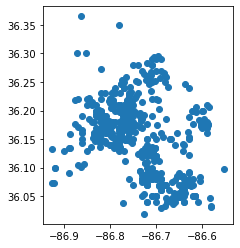

In [27]:
homicide_offenses.plot()

In [28]:
homicide_offenses_map = homicide_offenses.set_crs('EPSG:4326')

In [29]:
homicide_map = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
style1 = {'color': 'red', 'weight' : 6}
folium.GeoJson(homicide_offenses_map, style_function=lambda x: style1).add_to(homicide_map )
homicide_map 

In [30]:
#Saving cleand data as csv.
#homicide_offenses.to_csv('homicide.csv', index=False)

### Burglary/Breaking & Entering

In [31]:
Burglary_Breaking =police_incident_final_df2.loc[(police_incident_final_df2['Offense NIBRS'] == '220')]
Burglary_Breaking

,primary_key,incident_number,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
30,20210244919_11,20210244919,8TH AVE S,36.140,-86.780,6901.0,815.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.78000 36.14000),35,37203,NASHVILLE,2021,May,23,Saturday
55,20210244892_13,20210244892,EAST ARGYLE AVE,36.140,-86.780,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.78000 36.14000),35,37203,NASHVILLE,2021,May,21,Saturday
122,20210244892_15,20210244892,EAST ARGYLE AVE,36.140,-86.780,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,F,W,POINT (-86.78000 36.14000),35,37203,NASHVILLE,2021,May,21,Saturday
156,20210244892_16,20210244892,EAST ARGYLE AVE,36.140,-86.780,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.78000 36.14000),35,37203,NASHVILLE,2021,May,21,Saturday
167,20210244892_14,20210244892,EAST ARGYLE AVE,36.140,-86.780,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.78000 36.14000),35,37203,NASHVILLE,2021,May,21,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124575,20200508978_11,20200508978,FORTE RD,36.280,-86.890,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,F,W,POINT (-86.89000 36.28000),33,37015,ASHLAND CITY,2020,August,6,Monday
218041,20160083725_11,20160083725,GLEN ECHO LAKE RD,36.270,-86.890,3233.0,635.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.89000 36.27000),33,37015,ASHLAND CITY,2016,January,9,Thursday
257628,20180575062_11,20180575062,GRADY PL,36.270,-86.890,3233.0,635.0,18.0,OUTBUILDING,1.0,...,M,W,POINT (-86.89000 36.27000),33,37015,ASHLAND CITY,2018,May,10,Monday
111044,20160575980_11,20160575980,HWY 96,36.000,-87.020,4805.0,125.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-87.02000 36.00000),4,37064,FRANKLIN,2016,June,13,Friday


In [32]:
offense_type2 =Burglary_Breaking.groupby(['month'])['primary_key'].count()
offense_type2

month
April        2963
August       3040
December     2799
February     2488
January      3060
July         3461
June         3100
March        2631
May          3157
November     2823
October      3104
September    2889
Name: primary_key, dtype: int64

<AxesSubplot:>

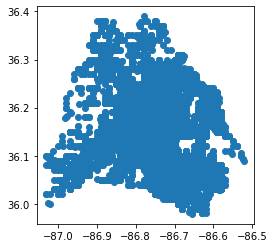

In [33]:
Burglary_Breaking.plot()

In [34]:
#Burglary_Breaking_map = Burglary_Breaking .set_crs('EPSG:4326')

In [35]:
#homicide_map = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
#style1 = {'color': 'red', 'weight' : 6}
#folium.GeoJson(homicide_offenses_map, style_function=lambda x: style1).add_to(homicide_map )
#homicide_map 

### Robbery

In [36]:


Robbery =police_incident_final_df2.loc[(police_incident_final_df2['Offense NIBRS'] == '120')]
Robbery


,primary_key,incident_number,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
293,20210249418_11,20210249418,12TH AVE N,36.160,-86.790,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,W,POINT (-86.79000 36.16000),35,37203,NASHVILLE,2021,May,21,Tuesday
807,20170988695_11,20170988695,2ND AVE N,36.160,-86.780,4101.0,415.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,F,W,POINT (-86.78000 36.16000),35,37203,NASHVILLE,2017,November,0,Friday
1022,20150265330_11,20150265330,4TH AVE N,36.160,-86.780,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,W,POINT (-86.78000 36.16000),35,37203,NASHVILLE,2015,March,0,Friday
1156,20170686175_11,20170686175,7TH AVE N & COMMERCE ST,36.161,-86.782,4109.0,421.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,B,POINT (-86.78200 36.16100),35,37203,NASHVILLE,2017,August,22,Thursday
2334,20200180367_11,20200180367,28TH AVE N,36.150,-86.810,5625.0,813.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,W,POINT (-86.81000 36.15000),35,37203,NASHVILLE,2020,March,21,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252926,20180260104_11,20180260104,INDIAN SUMMER DR,36.290,-86.790,2105.0,725.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,B,POINT (-86.79000 36.29000),19,37207,NASHVILLE,2018,March,18,Wednesday
332249,20210245727_11,20210245727,4364 4364,36.284,-86.790,2105.0,725.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,F,B,POINT (-86.79000 36.28400),19,37207,NASHVILLE,2021,May,22,Sunday
235601,20150876045_11,20150876045,CARSON MEADOWS LN,35.980,-86.620,8771.0,337.0,13.0,"HIGHWAY, ROAD, ALLEY",1.0,...,M,W,POINT (-86.62000 35.98000),10,37135,NOLENSVILLE,2015,September,19,Friday
437060,20210368214_11,20210368214,8329 8329,35.983,-86.662,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,...,F,W,POINT (-86.66200 35.98300),10,37135,NOLENSVILLE,2021,July,23,Wednesday


<AxesSubplot:>

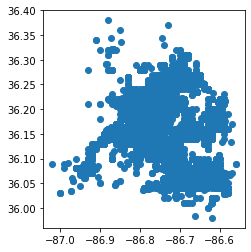

In [37]:
Robbery.plot()

In [38]:
#Robbery_map = Robbery.set_crs('EPSG:4326')

In [39]:
#rout56_Mar_Feb_AMpeak = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
#style1 = {'color': 'red', 'weight' : 6}
#folium.GeoJson(Robbery_map , style_function=lambda x: style1).add_to(rout56_Mar_Feb_AMpeak)
#rout56_Mar_Feb_AMpeak

In [40]:
offense_type3 =Robbery.groupby(['month'])['primary_key'].count()
offense_type3

month
April        1344
August       1517
December     1700
February     1337
January      1799
July         1786
June         1515
March        1200
May          1612
November     1642
October      1680
September    1614
Name: primary_key, dtype: int64

### larceny_theft_offenses

In [41]:
larceny_theft_offenses = police_incident_final_df2.loc[police_incident_final_df2['Offense NIBRS'].isin(['23A', '23B','23C','23D','23E','23F', '23G','23H'])] 
larceny_theft_offenses

,primary_key,incident_number,incident_location,lat,lng,RPA,Zone,location_code,location_description,Offense Number,...,victim_gender,Victim Race,geometry,index_right,zip,po_name,year,month,time(hr),day
0,20210237359_11,20210237359,DIVISION ST,36.150,-86.780,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,W,POINT (-86.78000 36.15000),35,37203,NASHVILLE,2021,April,8,Tuesday
36,20180109080_11,20180109080,MARLBOROUGH AVE,36.140,-86.820,5905.0,817.0,22.0,"RESIDENCE, HOME",1.0,...,M,I,POINT (-86.82000 36.14000),35,37203,NASHVILLE,2018,February,16,Thursday
88,20210245630_11,20210245630,BROADWAY,36.160,-86.780,4093.0,421.0,3.0,"BAR, NIGHT CLUB",1.0,...,F,W,POINT (-86.78000 36.16000),35,37203,NASHVILLE,2021,May,1,Sunday
89,20210247235_11,20210247235,17TH AVE S,36.150,-86.790,5705.0,811.0,20.0,"PARKING LOT, GARAGE",1.0,...,M,W,POINT (-86.79000 36.15000),35,37203,NASHVILLE,2021,April,17,Thursday
93,20210248817_11,20210248817,22ND AVE N,36.150,-86.800,5611.0,813.0,90.0,APARTMENT,1.0,...,M,W,POINT (-86.80000 36.15000),35,37203,NASHVILLE,2021,May,2,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760154,20160622756_11,20160622756,9600 9600,35.999,-87.028,4805.0,125.0,6.0,CONSTRUCTION SITE,1.0,...,M,W,POINT (-87.02800 35.99900),4,37064,FRANKLIN,2016,July,10,Monday
54125,20170849970_11,20170849970,KNIGHT CT,36.400,-86.760,2215.0,725.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.76000 36.40000),55,37152,RIDGETOP,2017,September,12,Monday
175303,20170510926_11,20170510926,KNIGHT CT,36.400,-86.760,2215.0,725.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.76000 36.40000),55,37152,RIDGETOP,2017,May,0,Saturday
216912,20180257175_11,20180257175,KNIGHT CT,36.400,-86.760,2215.0,725.0,22.0,"RESIDENCE, HOME",1.0,...,M,W,POINT (-86.76000 36.40000),55,37152,RIDGETOP,2018,March,12,Tuesday


In [42]:
offense_type4 =larceny_theft_offenses.groupby(['time(hr)'])['primary_key'].count()
offense_type4

time(hr)
0      8752
1      4920
2      4044
3      3086
4      2523
5      1938
6      2491
7      3349
8      5700
9      5241
10     6068
11     6347
12    12767
13     7561
14     8080
15     9180
16     9376
17    10165
18    10306
19     9370
20     9617
21     8334
22     8852
23     6801
Name: primary_key, dtype: int64

In [43]:
#Saving cleand data as csv.
#incident_new_zip.to_csv('file2.csv', index=False)

In [44]:
# incident_new_zip[incident_new_zip['offense_decription'].str.contains("DRUG")]

1.	What type of criminal activities most frequently noted? 
        a.	By crime type 


In [45]:
#offense_type = incident_new_zip.groupby(['offense_decription'])['primary_key'].count()
#offense_type = offense_type.to_frame().reset_index()
#offense_type_df = offense_type.rename(columns = {'primary_key' : 'incident_counts'})
#offense_type_df.sort_values(by = 'incident_counts', ascending = False)
#offense_type_df.tail(50)

In [46]:
incident_new_zip.describe()

,incident_number,lat,lng,RPA,Zone,location_code,Offense Number,vicitm_number,index_right,year,time(hr)
count,8.952080e+05,895208.000000,895208.000000,789198.000000,789198.000000,895188.000000,894989.000000,895208.000000,895208.000000,895208.000000,895208.000000
mean,2.018311e+10,36.156677,-86.743942,5837.644406,478.498258,26.888591,1.130941,1.202724,31.183167,2018.285248,13.130149
std,8.859086e+07,0.065577,0.076041,4549.968086,218.702477,23.847682,0.396648,0.937829,17.221550,2.173745,6.688331
min,1.960000e+09,35.975000,-87.040000,1001.000000,111.000000,1.000000,0.000000,1.000000,0.000000,2015.000000,0.000000
25%,2.016107e+10,36.110000,-86.790000,3019.000000,315.000000,13.000000,1.000000,1.000000,13.000000,2016.000000,9.000000
50%,2.018084e+10,36.160000,-86.750000,5331.000000,515.000000,22.000000,1.000000,1.000000,37.000000,2018.000000,14.000000
75%,2.020055e+10,36.200000,-86.694000,8757.000000,633.000000,22.000000,1.000000,1.000000,46.000000,2020.000000,19.000000
max,2.022038e+10,36.404000,-86.517000,95101.000000,827.000000,90.000000,8.000000,74.000000,55.000000,2022.000000,23.000000


In [47]:
#incident_per_zip = incident_new_zip.groupby(['zip'])['primary_key'].count()
#incident_per_zip = incident_per_zip.to_frame().reset_index()
#incident_grouped_by_zip = incident_per_zip.rename(columns = {'primary_key' : 'incident_counts'})
#incident_grouped_by_zip.sort_values(by = 'zip', ascending = True)


In [48]:
#incident_grouped_by_zip.plot.barh(x='zip', y='incident_counts', color = '#0077B6', figsize = (60,40), fontsize = 40)

#incident_grouped_by_zip.sort_values('incident_counts',inplace= True);

In [49]:
#incident_per_city = incident_new_zip.groupby(['po_name'])['primary_key'].count()
#incident_per_city = incident_per_city.to_frame().reset_index()
#incident_grouped_by_city = incident_per_city.rename(columns = {'primary_key' : 'incident_counts'})
#incident_grouped_by_city.sort_values(by = 'incident_counts', ascending = False)

In [50]:
#incident_grouped_by_city.plot.barh(x='po_name', y='incident_counts', color = '#0077B6', figsize = (8,6), fontsize = 10)
#incident_grouped_by_city.sort_values('incident_counts',inplace= True);